<h1 style="display: flex; align-items: center;">
  WoMakersCode
  <img src="https://cdn-images-1.medium.com/v2/resize:fit:1200/1*B8rGvo7fJ7qL4uFJ_II_-w.png" alt="Python logo" width="30" style="margin-left: 10px;">
</h1>

<h1> 🦋Bootcamp Data Analytics🦋</h1>

## <font color = red>**Desafio Individual - Teste de Hipótese**

In [2]:
# Importando os bibliotecas/pacotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import kstest, probplot
from scipy.stats import norm, binom, ttest_ind, chi2_contingency, shapiro
from scipy.stats import f_oneway

import warnings
warnings.filterwarnings('ignore')
sns.set(style = "whitegrid")
%matplotlib inline

In [3]:
df = pd.read_csv("experimento_teste_ab.csv", sep = ",")
df.head()

,Visitante_ID,Versão_Página,Visualizações,Conversões
0,1,A,167,1
1,2,A,160,0
2,3,A,170,0
3,4,A,161,1
4,5,A,104,0


### 1.	Qual dos cenários tem a maior taxa de conversão?

In [4]:
# Filtrar os dados para o cenário A e B
df_cenario_A = df[df['Versão_Página'] == 'A']
df_cenario_B = df[df['Versão_Página'] == 'B']

# Calcular o número de conversões e visualizações para cada cenário
conversoes_A = df_cenario_A['Conversões'].sum()
visualizacoes_A = len(df_cenario_A)

conversoes_B = df_cenario_B['Conversões'].sum()
visualizacoes_B = len(df_cenario_B)

# Calcular a taxa de conversão para cada cenário
taxa_conversao_A = (conversoes_A / visualizacoes_A) * 100 
taxa_conversao_B = (conversoes_B / visualizacoes_B) * 100  

# Exibir a taxa de conversão para cada cenário
print("Taxa de conversão para o cenário A:", taxa_conversao_A, "%")
print("Taxa de conversão para o cenário B:", taxa_conversao_B, "%")

# Determinar qual cenário tem a maior taxa de conversão
if taxa_conversao_A > taxa_conversao_B:
    print("O cenário A tem a maior taxa de conversão.")
elif taxa_conversao_B > taxa_conversao_A:
    print("O cenário B tem a maior taxa de conversão.")
else:
    print("Os cenários A e B têm a mesma taxa de conversão.")

Taxa de conversão para o cenário A: 10.5 %
Taxa de conversão para o cenário B: 12.5 %
O cenário B tem a maior taxa de conversão.


### 2.	Calcule qual o tamanho da amostra necessária para o desenvolvimento de um teste A/B, seguindo os seguintes critérios:

a.	O cenário A, da base, como o inicial, que funciona hoje.

b.	Considere 95% de confiança de que o efeito na conversão não foi aleatório com um nível de significância de 5% (alpha = 0,05). 

c.	Também considere 80% de certeza conseguir capturar o efeito da nova abordagem. 

d.	O aumento para 10% de conversão.

In [5]:
# Parâmetros
alpha = 0.05
confianca = 1 - alpha
potencia = 0.8
aumento_conversao = 0.10  # 10%

# Taxa de conversão no cenário A (cenário atual)
p1 = taxa_conversao_A / 100

# Taxa de conversão esperada no cenário B (com o aumento)
p2 = p1 + aumento_conversao

# Valor crítico da distribuição normal padrão para um nível de significância de alpha/2
Z_alpha_2 = norm.ppf(1 - (alpha / 2))

# Valor crítico da distribuição normal padrão para uma potência de 1 - beta
Z_beta = norm.ppf(potencia)

# Calculando o tamanho da amostra necessário
n = ((Z_alpha_2 * np.sqrt(p1 * (1 - p1)) + Z_beta * np.sqrt(p1 * (1 - p1)) + Z_alpha_2 * np.sqrt(p2 * (1 - p2))) ** 2) / ((p2 - p1) ** 2)

print("Tamanho da amostra necessário em cada grupo:", int(np.ceil(n)))

Tamanho da amostra necessário em cada grupo: 273


### Verifique a base pacientes.csv, os dados são fictícios. A sintetiza uma base de dados de um hospital que trata de pacientes com problemas cardíacos. Considere a base como a população, portanto as estatísticas da população são conhecidas. Responda as perguntas abaixo:


### 3.	Considerando uma amostra de 45 números que representam o index do dataframe, índices= ([909, 751, 402, 400, 726, 39, 184, 269, 255, 769, 209, 715, 677, 381, 793, 697,  89, 280, 232, 756, 358,  36, 439, 768, 967, 699, 473, 222,  89, 639, 883, 558, 757,  84, 907, 895, 217, 224, 311, 348, 146, 505, 273, 957, 362]). Considerando essa amostra é possível dizer que a idade média das pessoas com problemas cardíacos é maior que 50 anos? Nível de significância igual a 5%.


In [7]:
# Carregar o arquivo pacientes.csv
df2 = pd.read_csv("pacientes.csv")
# Excluir a coluna 'Unnamed: 0'
df2 = df2.drop(columns=['Unnamed: 0'])
df2.head()

,Pressao_Arterial,Idade,Genero,Etnia,Estado_Saude,Nome_Genero,Nome_Etnia,Nome_Estado_Saude
0,142.755809,31,1,1,1,Feminino,Afro-americano,Com condições de saúde adicionais
1,161.878468,35,1,1,0,Feminino,Afro-americano,Saudável
2,161.508259,39,0,3,1,Masculino,Asiático,Com condições de saúde adicionais
3,144.979408,43,1,3,1,Feminino,Asiático,Com condições de saúde adicionais
4,162.502954,55,0,2,1,Masculino,Hispânico,Com condições de saúde adicionais


In [8]:
# Selecionar a amostra de índices fornecida
indices = [909, 751, 402, 400, 726, 39, 184, 269, 255, 769, 209, 715, 677, 381,
           793, 697, 89, 280, 232, 756, 358, 36, 439, 768, 967, 699, 473, 222, 89, 
           639, 883, 558, 757, 84, 907, 895, 217, 224, 311, 348, 146, 505, 273, 957, 362]

# Filtrar o DataFrame original pela amostra de índices
df_amostra = df2.loc[indices]

# Filtrar pela coluna 'Idade'
idades_amostra = df_amostra['Idade']

# Realizar o teste de hipótese
resultado_teste = stats.ttest_1samp(idades_amostra, 50, alternative='greater')

# Exibir o resultado do teste
print("Estatística do teste t:", resultado_teste.statistic)
print("Valor p:", resultado_teste.pvalue)

# Verificar se o valor p é menor que alpha (0.05)
if resultado_teste.pvalue < 0.05:
    print("Rejeitamos a hipótese nula: A idade média das pessoas com problemas cardíacos é maior que 50 anos.")
else:
    print("Não rejeitamos a hipótese nula: A idade média das pessoas com problemas cardíacos é menor ou igual a 50 anos.")

Estatística do teste t: 0.052280983519350496
Valor p: 0.4792707233816392
Não rejeitamos a hipótese nula: A idade média das pessoas com problemas cardíacos é menor ou igual a 50 anos.


### 4.	Queremos entender que tipo de amostra estamos lidando se dividirmos os conjuntos em 2, sendo um com pessoas que têm condições de saúde adicionais e o outro com pessoas saudáveis. Seria dependente ou independente?

In [9]:
# Dividir o DataFrame em dois conjuntos: um para pessoas com condições de saúde adicionais e outro para pessoas saudáveis
grupo_condicoes = df2[df2['Estado_Saude'] == 1]['Idade']
grupo_saudavel = df2[df2['Estado_Saude'] == 0]['Idade']

# Realizar o teste t de Student para comparar as médias das idades entre os dois grupos
resultado_teste = stats.ttest_ind(grupo_condicoes, grupo_saudavel)

alpha = 0.05

print("Valor da estatística t:", resultado_teste.statistic)
print("Valor p:", resultado_teste.pvalue)

if resultado_teste.pvalue <alpha:
    print("As amostras são dependentes")
else:
    print("As amostras são independentes")


Valor da estatística t: 0.2052754936742535
Valor p: 0.8373987501834486
As amostras são independentes


### 5.	Agora considere o um conjunto de pessoas aleatória que representam o index do dataframe,  índices = ([690, 894,  67, 201, 364,  19,  60, 319, 588, 643, 855, 623, 530, 174, 105, 693,   6, 462, 973, 607, 811, 346, 354, 966, 943, 372]), podemos dizer que a pressão arterial média para pacientes com condições de saúde adicionais é igual à pressão arterial média para pacientes sem condições adicionais de saúde? Considere o nível de significância a 6%.

In [10]:
# Índices dos pacientes selecionados aleatoriamente
indices = [690, 894, 67, 201, 364, 19, 60, 319, 588, 643, 855, 623, 530, 
           174, 105, 693, 6, 462, 973, 607, 811, 346, 354, 966, 943, 372]

# Dividir o DataFrame em dois conjuntos: um para pacientes com e sem condições de saúde adicionais
com_condicoes = df2.loc[indices][df2['Estado_Saude'] == 1]['Pressao_Arterial']
sem_condicoes = df2.loc[indices][df2['Estado_Saude'] == 0]['Pressao_Arterial']

# Realizar o teste t de Student para amostras independentes
resultado_teste = stats.ttest_ind(com_condicoes, sem_condicoes)

nivel_significancia = 0.06

print("Valor da estatística t:", resultado_teste.statistic)
print("Valor p:", resultado_teste.pvalue)

if resultado_teste.pvalue < nivel_significancia:
    print("Há uma diferença significativa entre as médias dos grupos")
else:
    print("Não há uma diferença significativa entre as médias dos grupos")

Valor da estatística t: 0.08124024162329026
Valor p: 0.9359246016248415
Não há uma diferença significativa entre as médias dos grupos


### 6.	Existe uma diferença significativa na pressão arterial média entre diferentes grupos étnicos nesta população? (Teste ANOVA, alpha é 5%) 
a.	Hipótese Nula (H0): A pressão arterial média é a mesma em todos os grupos étnicos.

b.	Hipótese Alternativa (H1): Há uma diferença significativa na pressão arterial média entre pelo menos dois grupos étnicos nesta população.

In [11]:
# Função para filtrar por etnia e pressão arterial
def filtro_por_etnia_e_pressao_arterial(df2, etnia):
    return df2[df2['Etnia'] == etnia]['Pressao_Arterial']

# Dados de pressão arterial por grupo étnico
grupo_etnico_1 = filtro_por_etnia_e_pressao_arterial(df2, 0)
grupo_etnico_2 = filtro_por_etnia_e_pressao_arterial(df2, 1)
grupo_etnico_3 = filtro_por_etnia_e_pressao_arterial(df2, 2)
grupo_etnico_4 = filtro_por_etnia_e_pressao_arterial(df2, 3)

# Teste ANOVA
f_statistic, p_value = f_oneway(grupo_etnico_1, grupo_etnico_2, grupo_etnico_3, grupo_etnico_4)
print("Resultado do teste ANOVA:")
print("Estatística F:", f_statistic)
print("Valor-p:", p_value)

alpha = 0.05

if resultado_teste.pvalue < alpha:
    print("Hipótese Nula (H0): A pressão arterial média é a mesma em todos os grupos étnicos.")
else:
    print("Hipótese Alternativa (H1): Há uma diferença significativa na pressão arterial média entre pelo menos dois grupos étnicos nesta população.")

Resultado do teste ANOVA:
Estatística F: 0.23245296261596837
Valor-p: 0.873800123850745
Hipótese Alternativa (H1): Há uma diferença significativa na pressão arterial média entre pelo menos dois grupos étnicos nesta população.


### 7.	Lúcia é uma pesquisadora e tem o objetivo de entender a relação de gênero neste grupo de pacientes. Acredita-se que há uma relação entre o sexo e condições de saúde adicionais. (Teste qui-quadrado)

In [13]:
# Filtrar os dados para incluir apenas as linhas onde 'Nome_Estado_Saude' é igual a 'Com condições de saúde adicionais'
dados_filtrados = df2[df2['Nome_Estado_Saude'] == 'Com condições de saúde adicionais']

# Criar uma tabela de contingência entre gênero e estado de saúde considerando apenas os dados filtrados
tabela_contingencia = pd.crosstab(dados_filtrados['Nome_Estado_Saude'], dados_filtrados['Nome_Genero'])

# Realizar o teste qui-quadrado
chi2, p_valor, _, _ = chi2_contingency(tabela_contingencia)

alpha = 0.05

print("Valor qui-quadrado:", chi2)
print("Valor p:", p_valor)

if p_valor < alpha:
    print("Hipótese Nula (H0): há uma relação entre o gênero e as condições de saúde adicionais.")
else:
    print("Hipótese Alternativa (H1): não há uma relação entre o gênero e as condições de saúde adicionais.")


Valor qui-quadrado: 0.0
Valor p: 1.0
Hipótese Alternativa (H1): não há uma relação entre o gênero e as condições de saúde adicionais.


### 8.	Existe uma associação entre a idade dos pacientes e sua pressão arterial?

a.	Hipótese Nula (H0): A idade dos pacientes é independente da pressão arterial.

b.	Hipótese Alternativa (H1): A idade dos pacientes está associada à sua pressão arterial.

In [12]:
# Criar uma tabela de contingência entre idade e pressão arterial
tabela_contingencia = pd.crosstab(df2['Idade'], df2['Pressao_Arterial'])

# Realizar o teste qui-quadrado de independência
chi2, p_valor, _, _ = chi2_contingency(tabela_contingencia)

# Definir o nível de significância
alpha = 0.05

print("Valor qui-quadrado:", chi2)
print("Valor p:", p_valor)

# Interpretar o valor-p
if p_valor < alpha:
    print("Hipótese Nula (H0): A idade dos pacientes é independente da pressão arterial")
else:
    print("Hipótese Alternativa (H1): A idade dos pacientes está associada à sua pressão arterial")

Valor qui-quadrado: 40000.0
Valor p: 0.4428280388433224
Hipótese Alternativa (H1): A idade dos pacientes está associada à sua pressão arterial


### 9.	Qual é o intervalo de confiança para a média da pressão arterial entre os pacientes com condições de saúde adicionais? (nível de confiança 95%)

In [14]:
# Separar os pacientes com condições de saúde adicionais
pacientes_condicoes_adicionais = df2[df2['Estado_Saude'] == 1]

# Calcular a média e o desvio padrão da pressão arterial
media_pressao_condicoes = pacientes_condicoes_adicionais['Pressao_Arterial'].mean()
desvio_padrao_pressao_condicoes = pacientes_condicoes_adicionais['Pressao_Arterial'].std()

# Definir o nível de confiança
confianca = 0.95

# Calcular o intervalo de confiança usando a distribuição normal
z = norm.ppf((1 + confianca) / 2)  # Obtém o valor z para o nível de confiança
erro_padrao = desvio_padrao_pressao_condicoes / np.sqrt(len(pacientes_condicoes_adicionais))
intervalo_confianca = z * erro_padrao

# Calcular os limites do intervalo de confiança
limite_inferior = media_pressao_condicoes - intervalo_confianca
limite_superior = media_pressao_condicoes + intervalo_confianca

print("Intervalo de confiança para a média da pressão arterial:")
print("Limite inferior:", limite_inferior)
print("Limite superior:", limite_superior)

Intervalo de confiança para a média da pressão arterial:
Limite inferior: 149.22186145551754
Limite superior: 151.01504243479755


### 10.	A distribuição da pressão arterial na população segue uma distribuição normal?

a.	Hipótese Nula (H0): A distribuição da pressão arterial na população segue uma distribuição normal.
    
b.	Hipótese Alternativa (H1): A distribuição da pressão arterial na população não segue uma distribuição normal.

Valor da estatística KS: 1.0
Valor p (KS): 0.0
Rejeitamos a hipótese nula: a distribuição da pressão arterial não segue uma distribuição normal


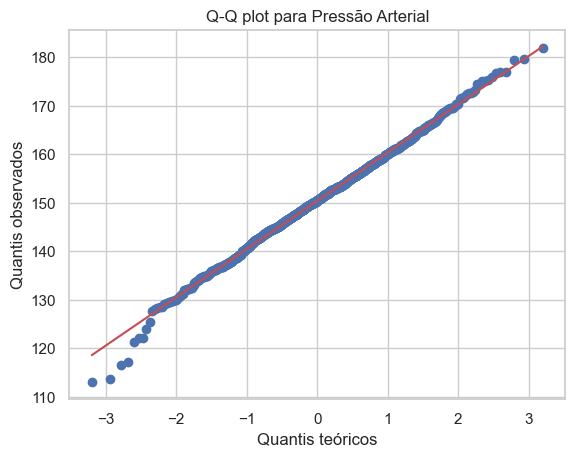

In [15]:
# Dados de pressão arterial
pressao_arterial = df2['Pressao_Arterial']

# Realizar o teste KS
stat_ks, p_valor_ks = kstest(pressao_arterial, 'norm')

alpha = 0.05

print("Valor da estatística KS:", stat_ks)
print("Valor p (KS):", p_valor_ks)

if p_valor_ks < alpha:
    print("Rejeitamos a hipótese nula: a distribuição da pressão arterial não segue uma distribuição normal")
else:
    print("Não rejeitamos a hipótese nula: a distribuição da pressão arterial segue uma distribuição normal")

# Plotar Q-Q plot
probplot(pressao_arterial, dist="norm", plot=plt)
plt.title('Q-Q plot para Pressão Arterial')
plt.xlabel('Quantis teóricos')
plt.ylabel('Quantis observados')
plt.show()